# Project 3 : Openfoodfacts (notebook du nettoyage)

Matthieu cazier

### Objectif : 
<ul>
<li>Traiter le jeu de données (automatiser)</li>
<li>Produire une  visualisation des données</li>
<li>Confirmer ou infirmer les hypothèse à l'aide d'une analyse multivariée, tests statitiques</li>
<li>Elaborer une idée d'application </li>
<li>Rédiger un rapport d'exploration et picher votre idée </li>
</ul>

## Checklist de base

### Analyse de forme
<ul>
<li>Variable target :nutrition-grade</li>
<li>Ligne et colonnes :1398748, 181 </li>
<li>Types de varibles :float64 : 122 , object: 57, int64 : 2 </li>
<li>Analyse des valeurs manquantes : Beaucoup de valeur manquantes </li>
<li>Nombre de ligne en double :40, 181 </li>
</ul>

### Analyse de fond
<ul>
<li>Visualisation de la target :</li>
<li>Signification des variables : </li>
<li>Relation Variable / Target : l'énergie/ la graisse et  </li>
</ul>

### Infos :
nutriscore : Les résultats du calcul donnent une valeur comprise entre –15 et +40. La couleur verte correspondant à (–15 –2), le vert clair à (–1 +3), le jaune (+4 +11), l'orange (+12 +16) et le rouge (+17 à +40)


4 types de données : 
<ul>
<li>Information générales</li>
<li>Tags </li>
<li>Ingrédiants</li>
<li>Données nutritionnelles </li>
</ul>

### objectif : 

A partir des données nutritionnelles obtenir le grade nutrionnelle de la recette. 


### charger le dataset

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

In [2]:
dataset = pd.read_csv('dataset.csv', sep = '\t')

C:\Users\matthieu.cazier\Anaconda3\envs\oc\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0,24,25,26,28,44,49,52,61) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
df = dataset.copy()

### Vu d'ensemble

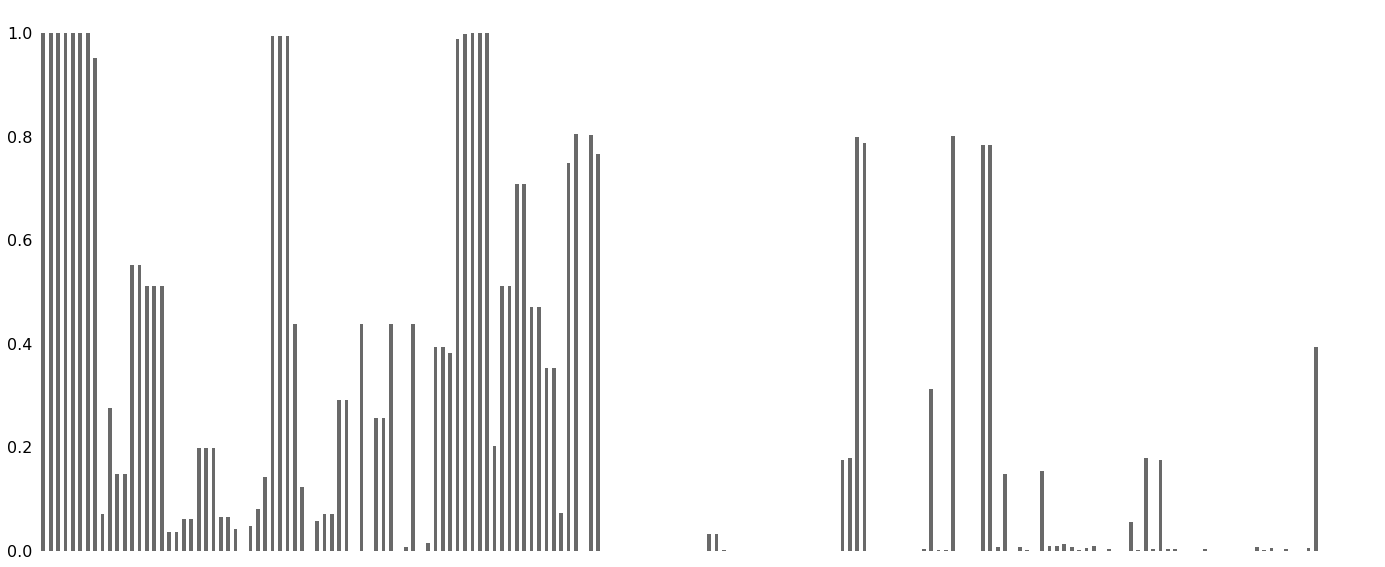

In [13]:
msno.bar(df.sample(1000))

In [14]:
A = df.iloc[:,0:49]
B = df.iloc[:,49:99]
C = df.iloc[:,99:140]
D = df.iloc[:,140:]

Plusieurs groupe pour avoir la visualisation des variables

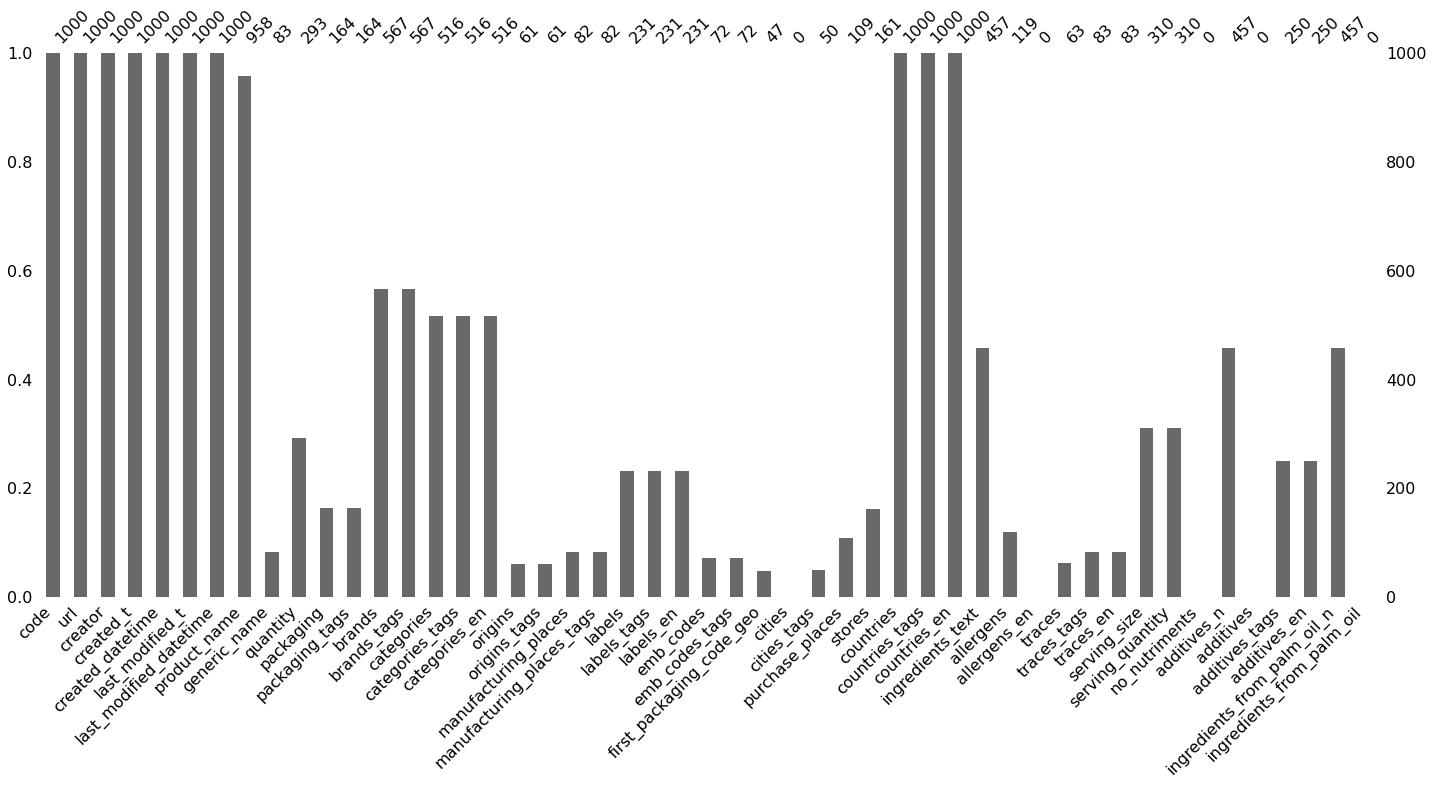

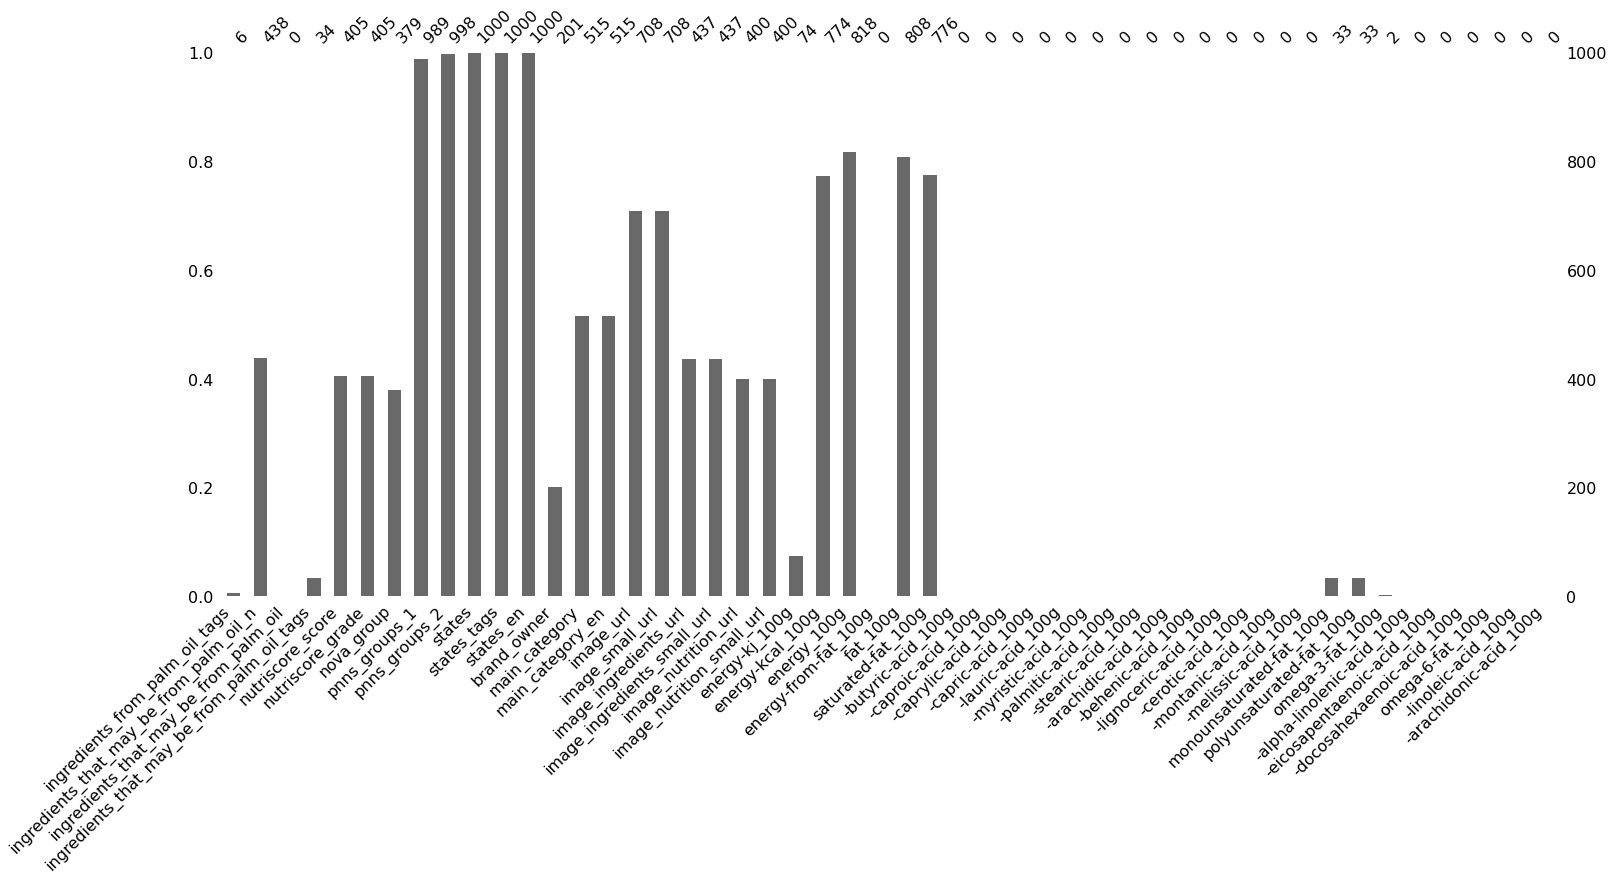

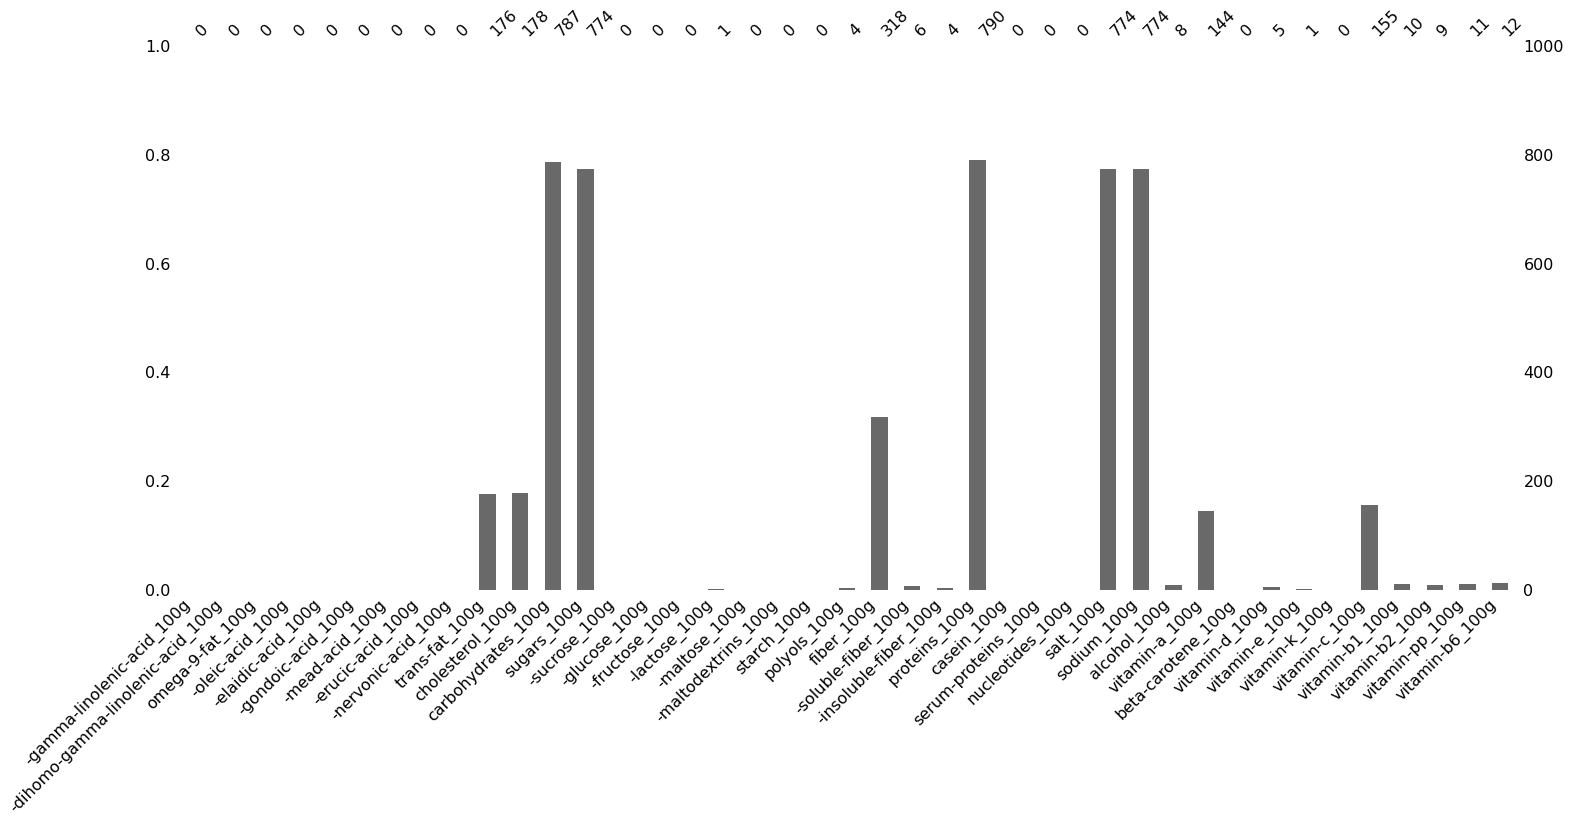

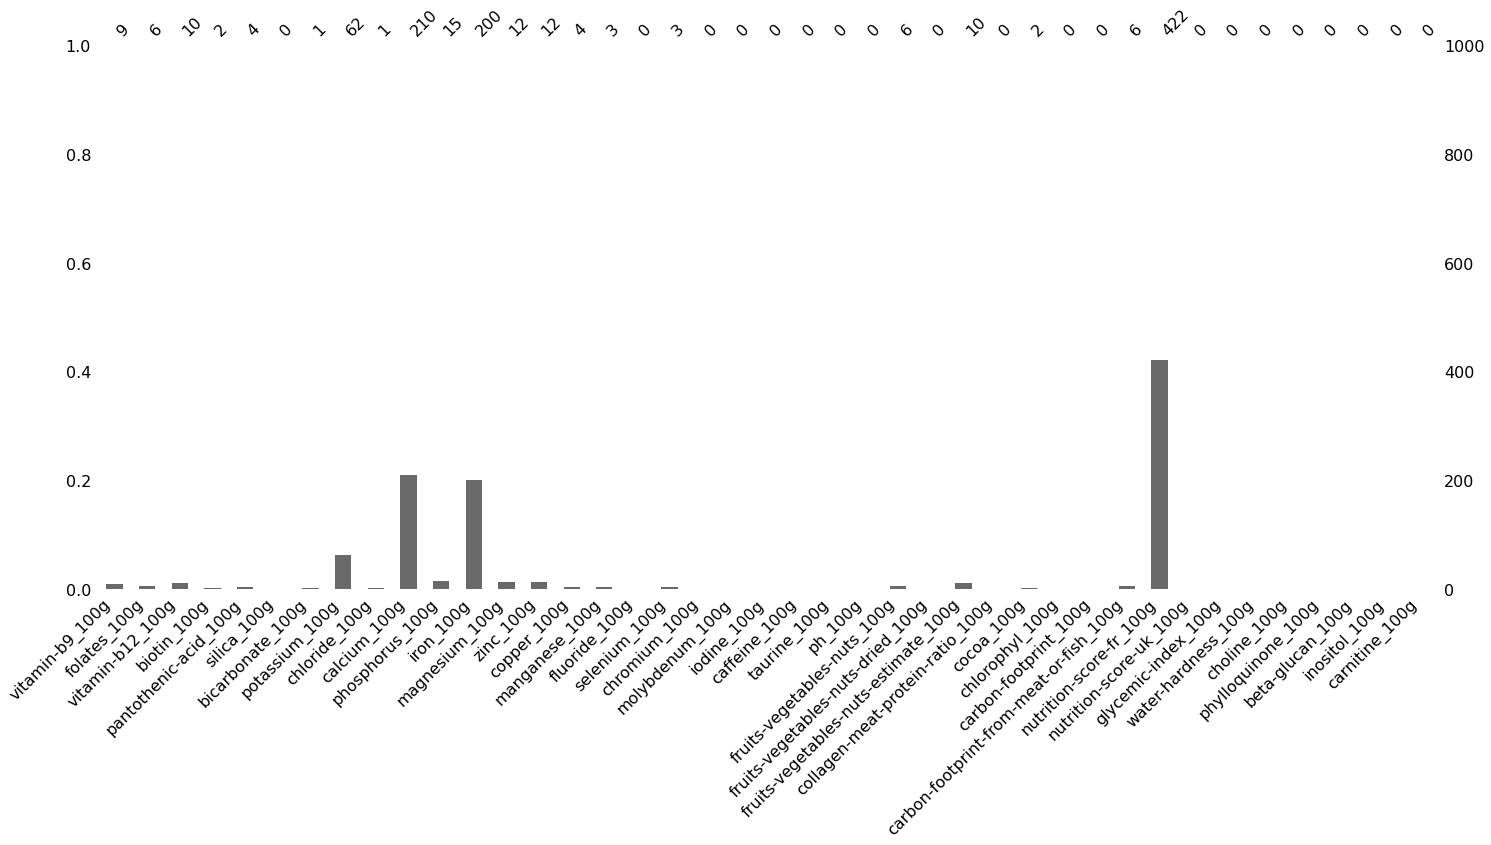

In [15]:
plt.figure()
msno.bar(A.sample(1000))
plt.figure()
msno.bar(B.sample(1000))
plt.figure()
msno.bar(C.sample(1000))
plt.figure()
msno.bar(D.sample(1000))


### Supprimer les colonnes qui ont 80% de données manquante (colonnes)

In [16]:
df.shape

(1398748, 181)

In [17]:
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.8]]  # si la colonne à 80% de données manquantes je supprime

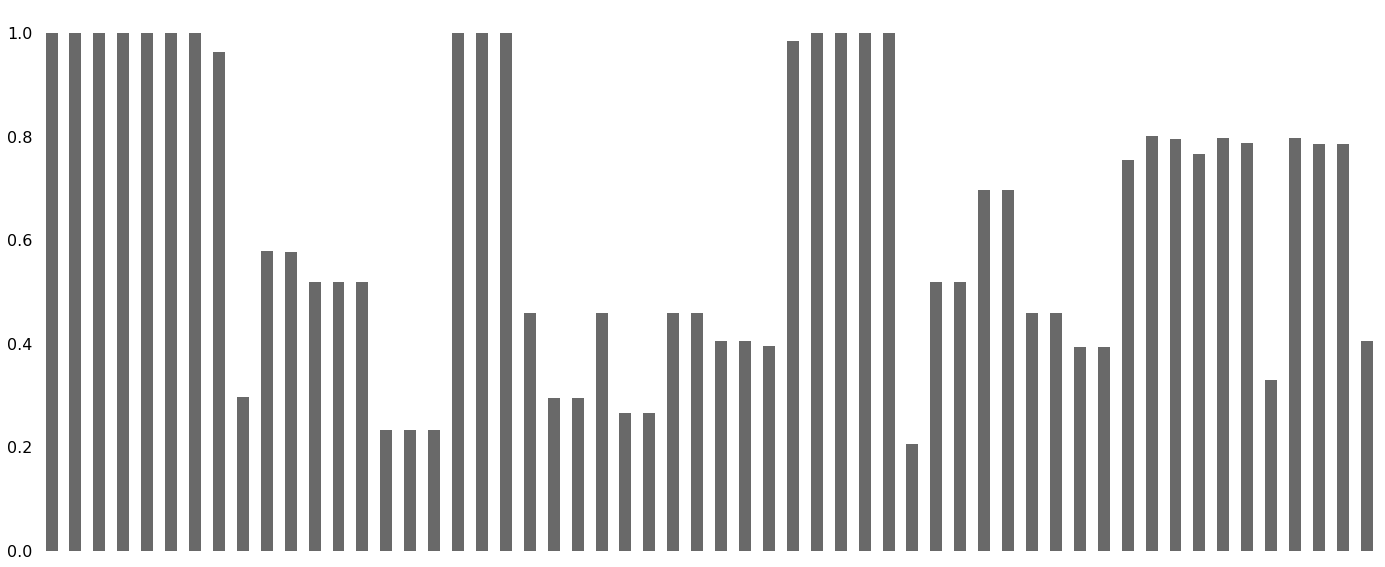

In [18]:
msno.bar(df.sample(1000))

In [19]:
df.shape

(1398748, 56)

###### Quels sont le type de variables nous avons ? 

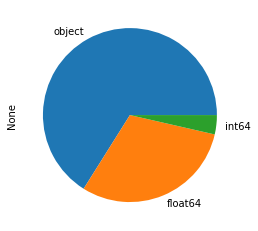

In [9]:
df.dtypes.value_counts().plot.pie()

visualisation des variables objet 

In [10]:
for col in df.select_dtypes('object'):    
    effectifs = df[col].value_counts()
    modalites = effectifs.index # l'index de effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = [col]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(df) # len(data) renvoie la taille de l'échantillon
    print(tab)

                  code  n             f
0          79200370213  3  2.144775e-06
1          42272000777  2  1.429850e-06
2         873934002187  2  1.429850e-06
3          41570081013  2  1.429850e-06
4        2432872027294  2  1.429850e-06
...                ... ..           ...
1398141    11110016980  1  7.149251e-07
1398142  5413342111702  1  7.149251e-07
1398143  3700279306199  1  7.149251e-07
1398144  8437003282393  1  7.149251e-07
1398145  6291003015168  1  7.149251e-07

[1398146 rows x 3 columns]
                                                       url  n             f
0        http://world-en.openfoodfacts.org/product/3760...  2  1.429850e-06
1        http://world-en.openfoodfacts.org/product/2609...  2  1.429850e-06
2        http://world-en.openfoodfacts.org/product/2103...  2  1.429850e-06
3        http://world-en.openfoodfacts.org/product/3480...  2  1.429850e-06
4        http://world-en.openfoodfacts.org/product/8437...  2  1.429850e-06
...                                 

                                               labels_en      n             f
0                                                Organic  35203  2.516751e-02
1                                            Gluten-free  26682  1.907563e-02
2                                         Made in France  10593  7.573201e-03
3                                       Vegetarian,Vegan   8430  6.026818e-03
4                                       No preservatives   8339  5.961760e-03
...                                                  ...    ...           ...
44881  Organic,EU Organic,Fair trade,Non-EU Agricultu...      1  7.149251e-07
44882  Organic,Certified by Ecocert,EU Organic,fr:ab-...      1  7.149251e-07
44883   Egg laid in France,Products for professional use      1  7.149251e-07
44884  Vegetarian,Gluten-free,Vegan,No eggs,No milk,W...      1  7.149251e-07
44885              Gluten-free,it:100-formaggio-italiano      1  7.149251e-07

[44886 rows x 3 columns]
                                      

                                            states_tags       n             f
0     en:to-be-completed,en:nutrition-facts-complete...  200710  1.434926e-01
1     en:to-be-completed,en:nutrition-facts-complete...  142223  1.016788e-01
2     en:to-be-completed,en:nutrition-facts-complete...  129827  9.281658e-02
3     en:to-be-completed,en:nutrition-facts-complete...   83008  5.934450e-02
4     en:to-be-completed,en:nutrition-facts-to-be-co...   56383  4.030962e-02
...                                                 ...     ...           ...
1025  en:to-be-completed,en:nutrition-facts-to-be-co...       1  7.149251e-07
1026  en:to-be-completed,en:nutrition-facts-to-be-co...       1  7.149251e-07
1027  en:to-be-completed,en:nutrition-facts-complete...       1  7.149251e-07
1028  en:to-be-completed,en:nutrition-facts-complete...       1  7.149251e-07
1029  en:to-be-completed,en:nutrition-facts-complete...       1  7.149251e-07

[1030 rows x 3 columns]
                                       

                                image_nutrition_small_url  n             f
0       https://static.openfoodfacts.org/images/produc...  2  1.429850e-06
1       https://static.openfoodfacts.org/images/produc...  2  1.429850e-06
2       https://static.openfoodfacts.org/images/produc...  2  1.429850e-06
3       https://static.openfoodfacts.org/images/produc...  2  1.429850e-06
4       https://static.openfoodfacts.org/images/produc...  2  1.429850e-06
...                                                   ... ..           ...
540959  https://static.openfoodfacts.org/images/produc...  1  7.149251e-07
540960  https://static.openfoodfacts.org/images/produc...  1  7.149251e-07
540961  https://static.openfoodfacts.org/images/produc...  1  7.149251e-07
540962  https://static.openfoodfacts.org/images/produc...  1  7.149251e-07
540963  https://static.openfoodfacts.org/images/produc...  1  7.149251e-07

[540964 rows x 3 columns]


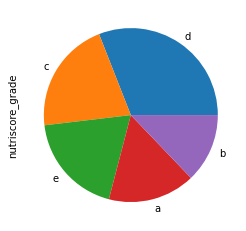

In [11]:
df["nutriscore_grade"].value_counts(normalize=True).plot(kind='pie') #répartition de notre targuet


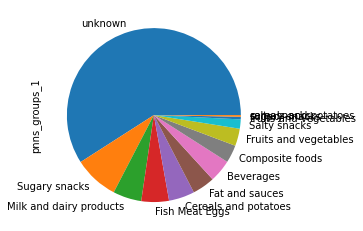

In [12]:
df["pnns_groups_1"].value_counts(normalize=True).plot(kind='pie')

In [13]:
df.select_dtypes('object')

,code,url,creator,created_datetime,last_modified_datetime,product_name,quantity,brands,brands_tags,categories,...,states_en,brand_owner,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,NaN,...,"To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,2018-10-13T21:06:14Z,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,NaN,...,"To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,2019-11-19T15:02:16Z,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,NaN,...,"To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,2015-10-11T14:09:21Z,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,courte-paille,"Epicerie, Condiments, Sauces, Moutardes",...,"To be completed,Nutrition facts completed,Ingr...",NaN,en:mustards,Mustards,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,2019-06-08T18:56:13Z,2019-06-08T18:56:13Z,Sfiudwx,dgesc,Watt,watt,Xsf,...,"To be completed,Nutrition facts to be complete...",NaN,fr:xsf,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398743,9999999900686,http://world-en.openfoodfacts.org/product/9999...,kiliweb,2019-07-16T07:17:50Z,2020-05-07T15:37:00Z,Marrons glacés,NaN,NaN,NaN,Marrons glacés,...,"To be completed,Nutrition facts to be complete...",NaN,en:marrons-glaces,Marrons glacés,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN
1398744,9999999901,http://world-en.openfoodfacts.org/product/9999...,kiliweb,2020-03-24T16:48:24Z,2020-03-24T16:48:25Z,Scs,NaN,NaN,NaN,NaN,...,"To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...
1398745,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,2019-10-31T09:24:26Z,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,NaN,NaN,...,"To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN
1398746,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,2020-02-08T14:20:13Z,2020-02-25T15:24:07Z,Fati,440 g,NaN,NaN,NaN,...,"To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,NaN,NaN,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...


### Supprimer les doublons (lignes)

In [20]:
df.shape

(1398748, 56)

In [21]:
df = df.drop_duplicates () # 1 398 748 --> 1 398 707 

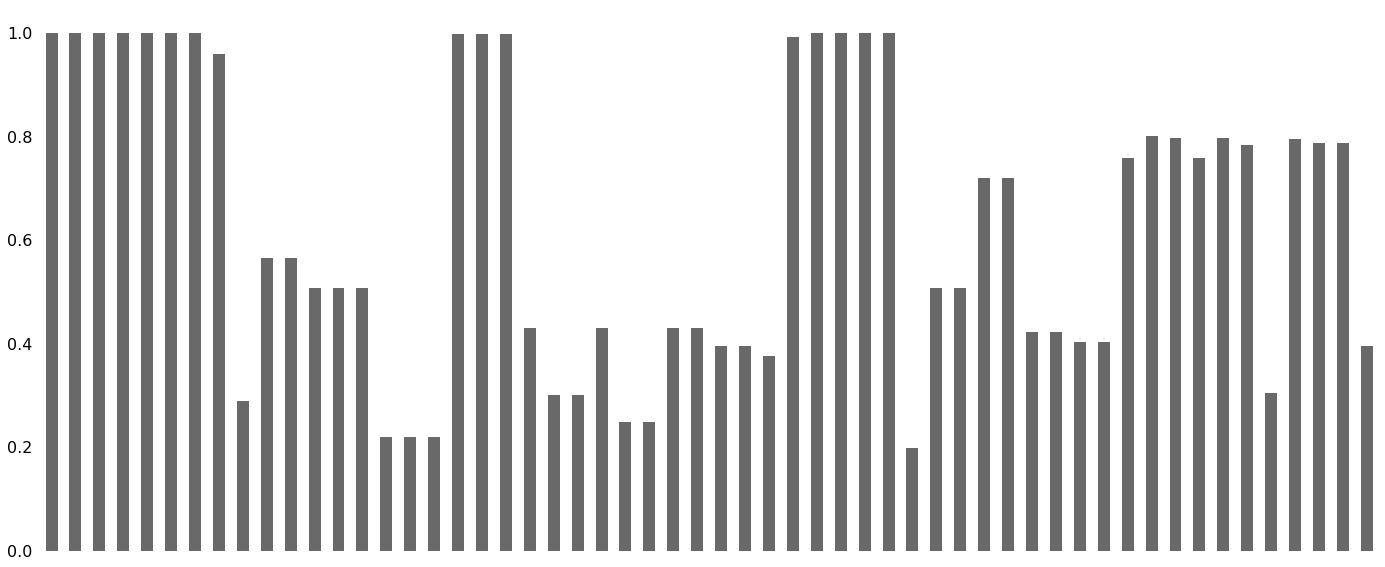

In [22]:
msno.bar(df.sample(1000))

In [23]:
df.shape

(1398707, 56)

### Garder les colonnes qui nous intéresse (colonnes)

par rapport à notre choix d'application je garde seulement les colonnes qui sont des données nutritionnelles

In [24]:
df = df.drop(['code','url','creator','created_t','created_datetime',                   
              'last_modified_t','last_modified_datetime','product_name',
              'brands','brands_tags','categories','categories_tags','categories_en',
              'countries_tags','countries_en',
               'ingredients_text','serving_size','serving_quantity','additives_n','additives_tags',
               'additives_en','ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n',
               'states','states_tags','states_en','brand_owner','main_category',
               'nova_group','pnns_groups_1','pnns_groups_2','main_category_en','labels','labels_tags','labels_en',
             'image_url','image_small_url','image_ingredients_url','image_ingredients_small_url','image_nutrition_url',
             'image_nutrition_small_url','quantity','nutriscore_score'],axis=1)

In [25]:
df.shape

(1398707, 13)

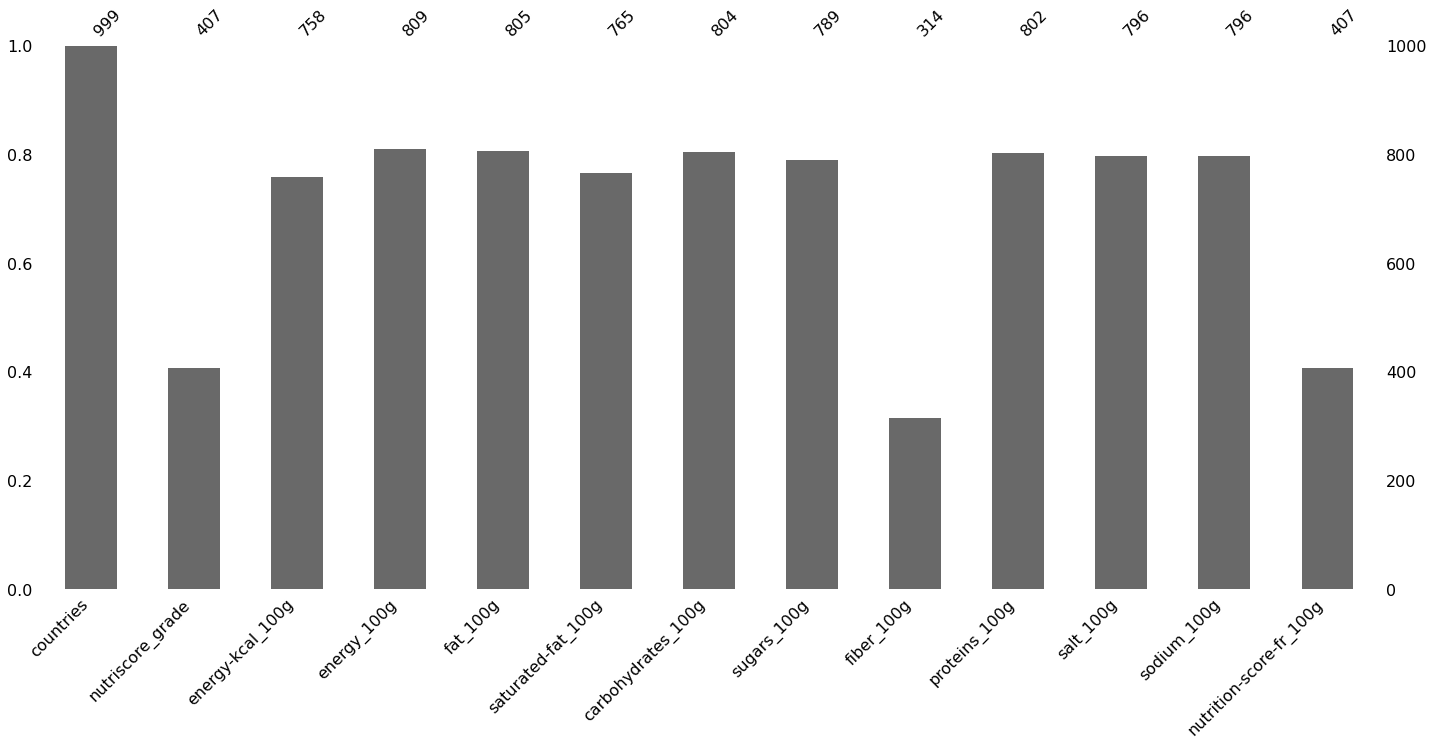

In [26]:
msno.bar(df.sample(1000))

### Garder les lignes(france)

In [27]:
df = df.loc[df['countries']=="France"] #On garde juste les données française 

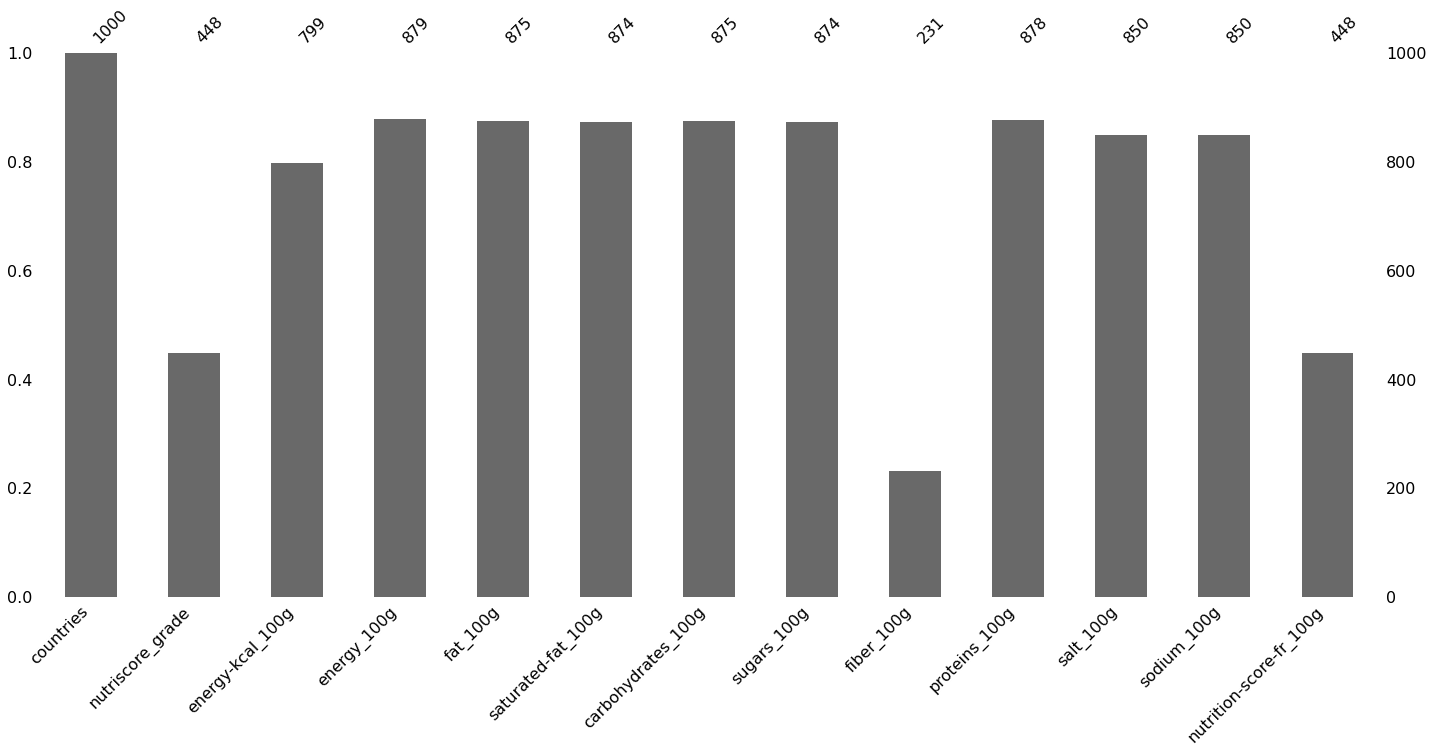

In [28]:
msno.bar(df.sample(1000))

In [16]:
df.shape                      # 1 398 146 --> 420 045

(420045, 13)

In [29]:
df = df.drop(['countries'],axis=1)

In [30]:
dff = df.copy()  ### garder pour comparer avec les graphiques

### Garder les lignes ou le score nutrionelle_fr_100 est présent

In [31]:
df = df.dropna(subset=['nutrition-score-fr_100g']) ### je veux absolument avoir cette information
df = df.dropna(subset=['nutriscore_grade'])

In [32]:
df.shape                         # 420 045 --> 182 331

(182331, 12)

### Fonction données manquantes

In [33]:
#Nombre de valeur manquante
def num_missing(df):
    return sum(df.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeursmanquantes par colonne:")
print(df.apply(num_missing, axis=0))

Valeursmanquantes par colonne:
nutriscore_grade                0
energy-kcal_100g            29815
energy_100g                   283
fat_100g                      287
saturated-fat_100g            283
carbohydrates_100g            358
sugars_100g                   283
fiber_100g                 110598
proteins_100g                 282
salt_100g                     209
sodium_100g                   209
nutrition-score-fr_100g         0
dtype: int64


### renommer certaines colonnes

In [34]:
df = df.rename(columns = {'nutrition-score-fr_100g': 'nutrition_score', 'energy-kcal_100g': 'energy_kcal_100g','saturated-fat_100g':'saturated_fat_100g'})

In [35]:
df = df.drop(["fiber_100g"],axis=1)

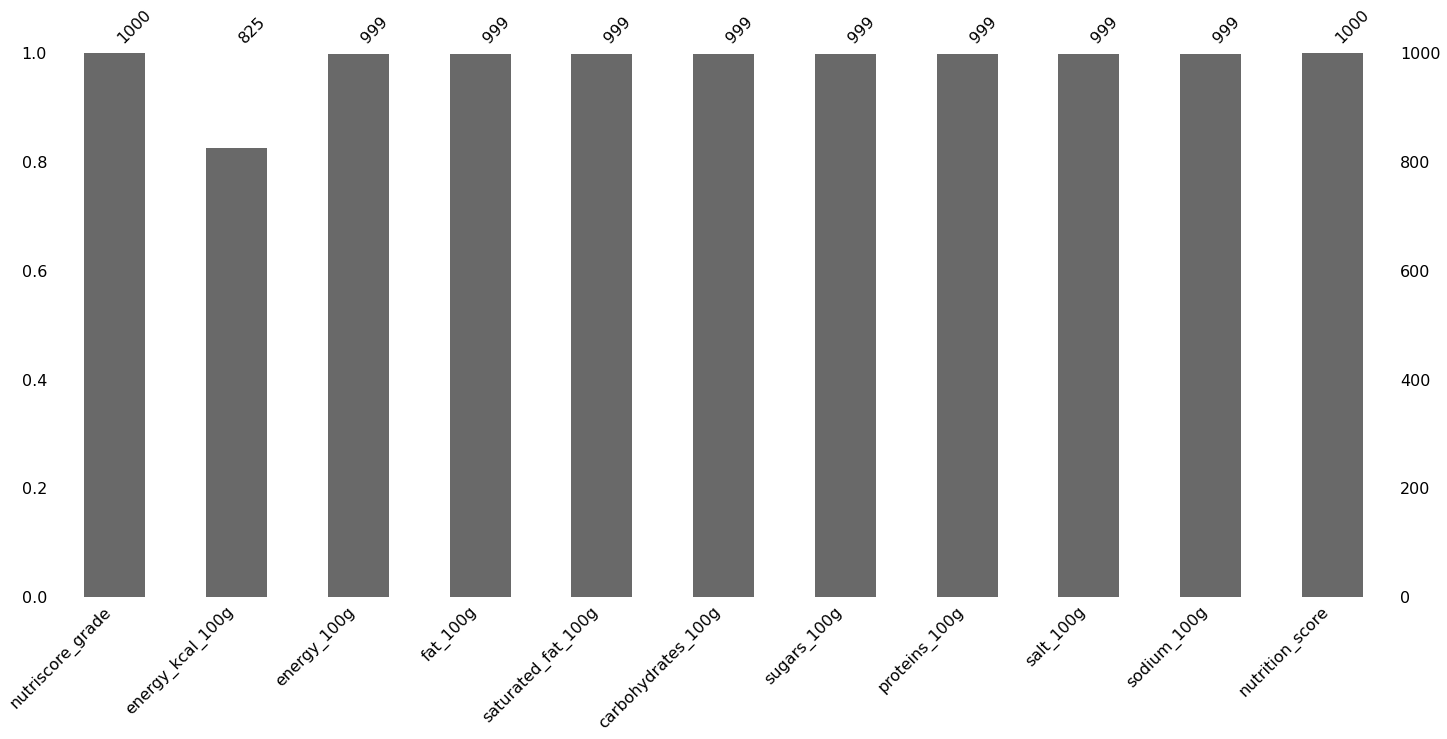

In [36]:
msno.bar(df.sample(1000))

In [24]:
df.shape

(182331, 11)

### Supprimer les Valeurs abérentes

valeur trop haute (vu sur internet) et valeurs inférieur à 0 

In [37]:
df = df.query("~(energy_kcal_100g<0) and ~(energy_kcal_100g> 900)")
df = df.query("~(energy_100g<0) and ~(energy_100g> 90000)")
df = df.query("~(fat_100g<0) and ~(fat_100g>100)")
df = df.query("~(saturated_fat_100g<0) and ~(saturated_fat_100g> 100)")
df = df.query("~(carbohydrates_100g<0) and ~(carbohydrates_100g> 100)")
df = df.query("~(sugars_100g<0) and ~(sugars_100g> 100)")
df = df.query("~(proteins_100g<0) and ~(proteins_100g> 100)")
df = df.query("~(salt_100g<0) and ~(salt_100g>100)")
df = df.query("~(sodium_100g<0) and ~(sodium_100g>100)")
df = df.query("~(nutrition_score<-15) and ~(nutrition_score>40)")
#182 331 -->182 112

In [38]:
df.shape

(182112, 11)

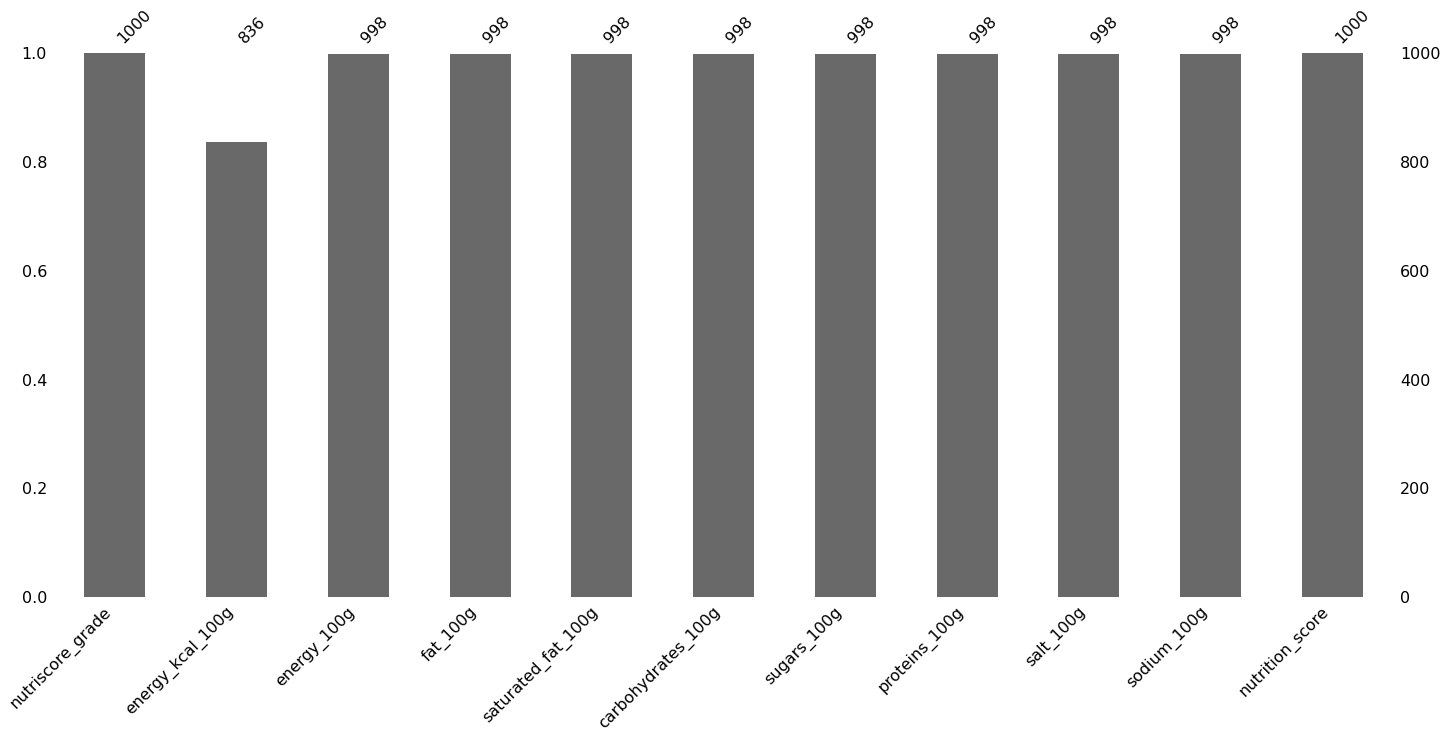

In [39]:
msno.bar(df.sample(1000))

### Remplacer les valeurs manquantes (KNNImputer)

In [40]:
data = df.drop(['nutriscore_grade'],axis=1)
targuet = df['nutriscore_grade']

In [41]:
from sklearn.impute import KNNImputer

In [42]:
data = data.to_numpy()

la valeur moyenne des n_neighbors voisins

In [43]:
imputer = KNNImputer(n_neighbors=1)
imputer.fit_transform(data)
data = pd.DataFrame(imputer.fit_transform(data))

In [45]:
#Nombre de valeur manquante
def num_missing(data):
    return sum(data.isnull())
# On applique cette fonction pour chaque colonne:
print("Valeursmanquantes par colonne:")
print(data.apply(num_missing, axis=0))

Valeursmanquantes par colonne:
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64


renommer les colonnes

In [46]:
data = data.rename(columns={0: "energy_kcal", 1: "energy", 2: "fat",3:"saturated_fat",4:"carbohydrates",5:"sugars",6:"proteins",7:"salt",8:"sodium",9:"nutrition_score"})

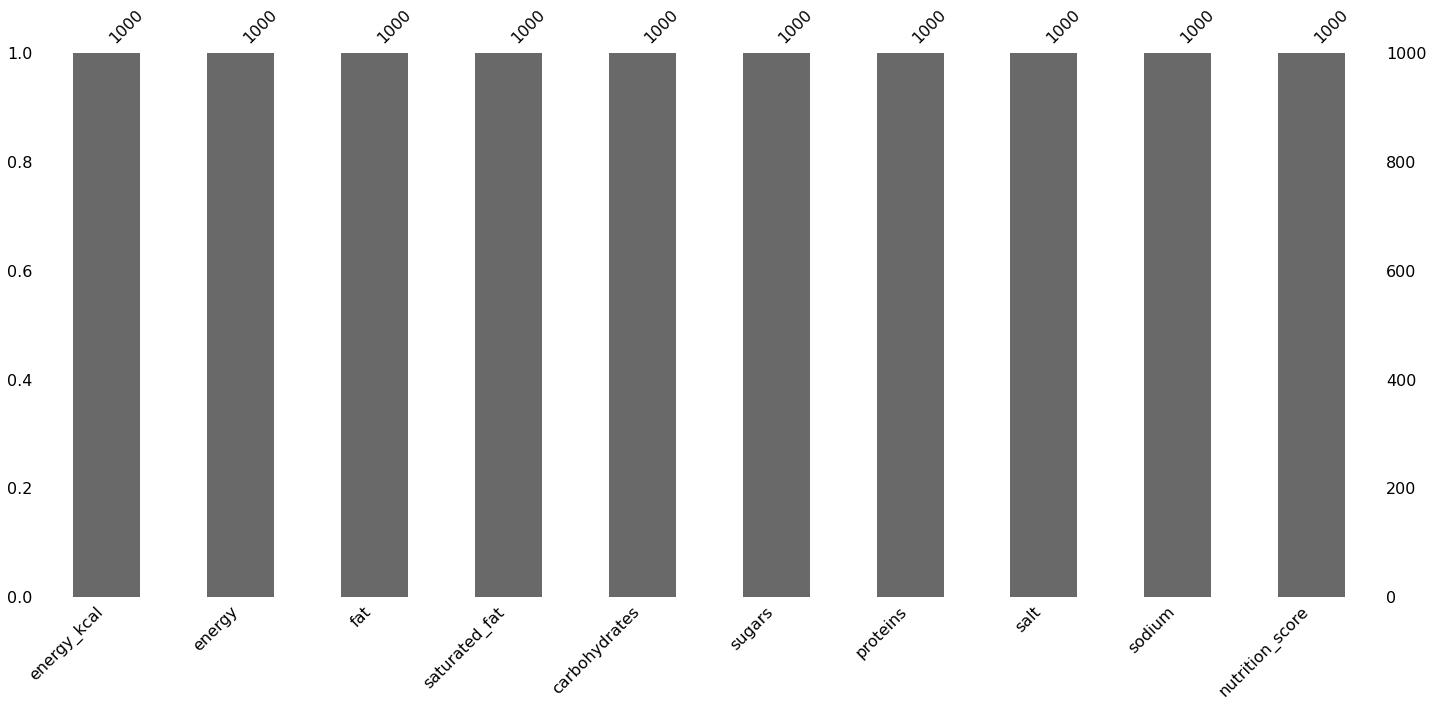

In [47]:
msno.bar(data.sample(1000))

In [ ]:
dff = dff.drop(['fiber_100g'],axis=1) ### j'ai supprimé la variable fiber de la copy du df (avant nettoyage) pour avoir le même df avant et après nettoyage pour une comparaison ci-dessous

##### Regarder la tendance centrale et la dispersion de chaque variable avant et après le nettoyage (comparaison)

--------------------
energy-kcal_100g
moy:
 274.3188337896982 & après nettoyage 272.81871835437846
med:
 263.0 & après nettoyage 249.0
mod:
 0    0.0
dtype: float64 & après nettoyage 0    0.0
dtype: float64
var:
 36621.40686616282 & après nettoyage 35216.04670057214
ect:
 191.36720425967147 & après nettoyage 187.65939012096393
skw:
 0.8066035599236713 & après nettoyage 0.7017358139436214
kur:
 2.7017705441181663 & après nettoyage 0.21550711541531253


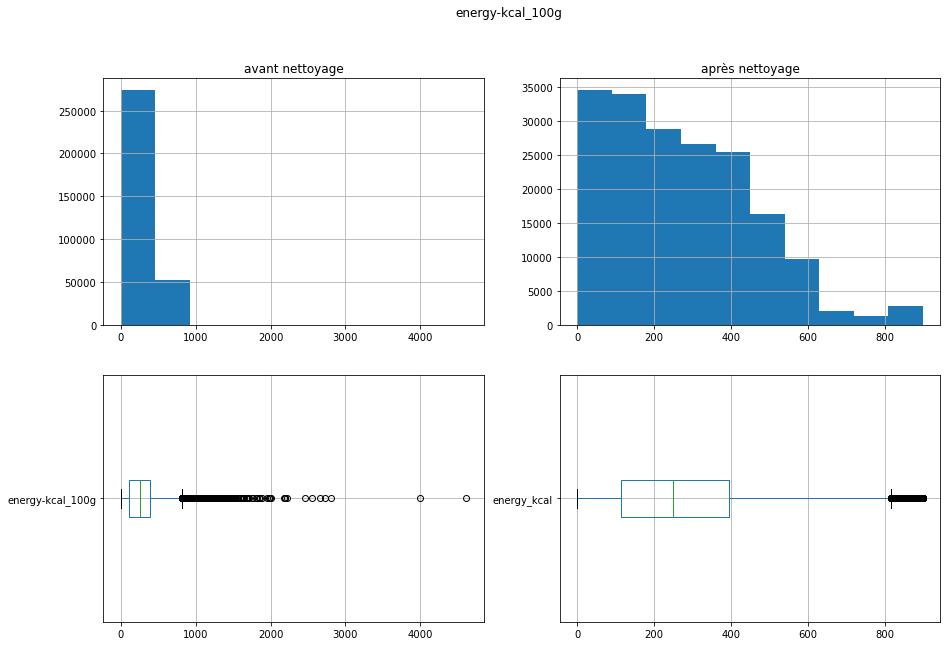

--------------------
energy_100g
moy:
 1138.933960446722 & après nettoyage 1140.737279734449
med:
 1079.0 & après nettoyage 1042.0
mod:
 0    0.0
dtype: float64 & après nettoyage 0    0.0
dtype: float64
var:
 629850.7412824687 & après nettoyage 615149.5215946635
ect:
 793.63136359551 & après nettoyage 784.3146827611118
skw:
 0.7647982796677129 & après nettoyage 0.6985343805197997
kur:
 2.1560916219708313 & après nettoyage 0.20459675514112874


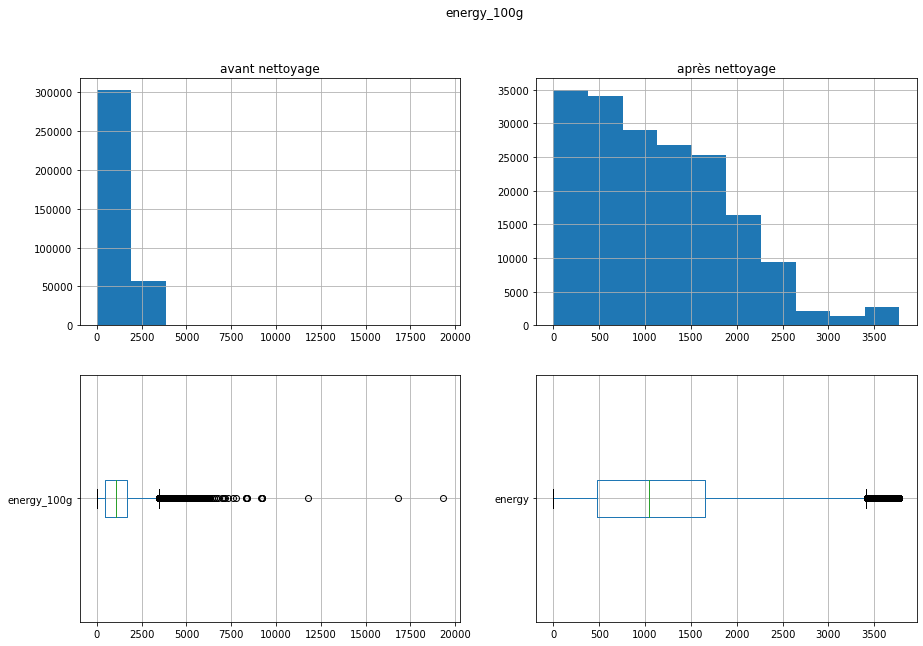

--------------------
fat_100g
moy:
 13.816062462083385 & après nettoyage 15.12158342719356
med:
 7.5 & après nettoyage 8.6000003814697
mod:
 0    0.0
dtype: float64 & après nettoyage 0    0.0
dtype: float64
var:
 301.3156727885943 & après nettoyage 339.15284450497836
ect:
 17.358446727417586 & après nettoyage 18.416102858774934
skw:
 2.3372835460015526 & après nettoyage 2.0605532525516073
kur:
 13.00049849228056 & après nettoyage 5.361263979327358


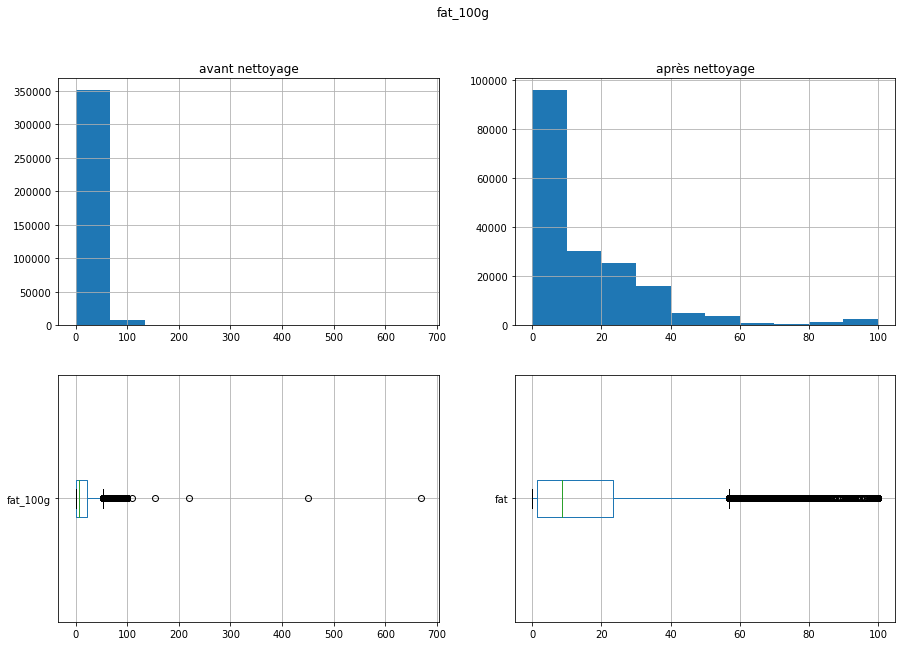

--------------------
saturated-fat_100g
moy:
 5.356917446467971 & après nettoyage 5.894948328571155
med:
 2.0 & après nettoyage 2.3
mod:
 0    0.0
dtype: float64 & après nettoyage 0    0.0
dtype: float64
var:
 149.07921601250692 & après nettoyage 73.47875662852681
ect:
 12.20979999887414 & après nettoyage 8.57197507162304
skw:
 262.13292027617615 & après nettoyage 3.1113173137801344
kur:
 118740.50451537524 & après nettoyage 17.309126098169244


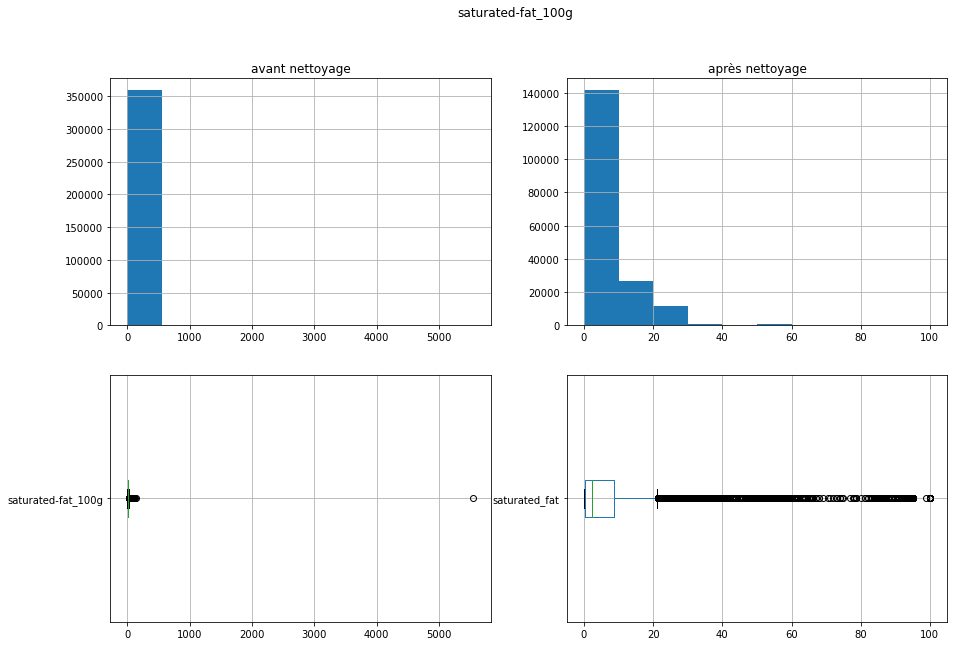

--------------------
carbohydrates_100g
moy:
 26.959025112758216 & après nettoyage 24.34966543097372
med:
 13.899999809265001 & après nettoyage 12.0
mod:
 0    0.0
dtype: float64 & après nettoyage 0    0.0
dtype: float64
var:
 770.3910339727336 & après nettoyage 680.1733000320057
ect:
 27.755918899808265 & après nettoyage 26.080132285554186
skw:
 0.7877780699230722 & après nettoyage 0.8707243332586436
kur:
 0.17872782869878678 & après nettoyage -0.5711714173182871


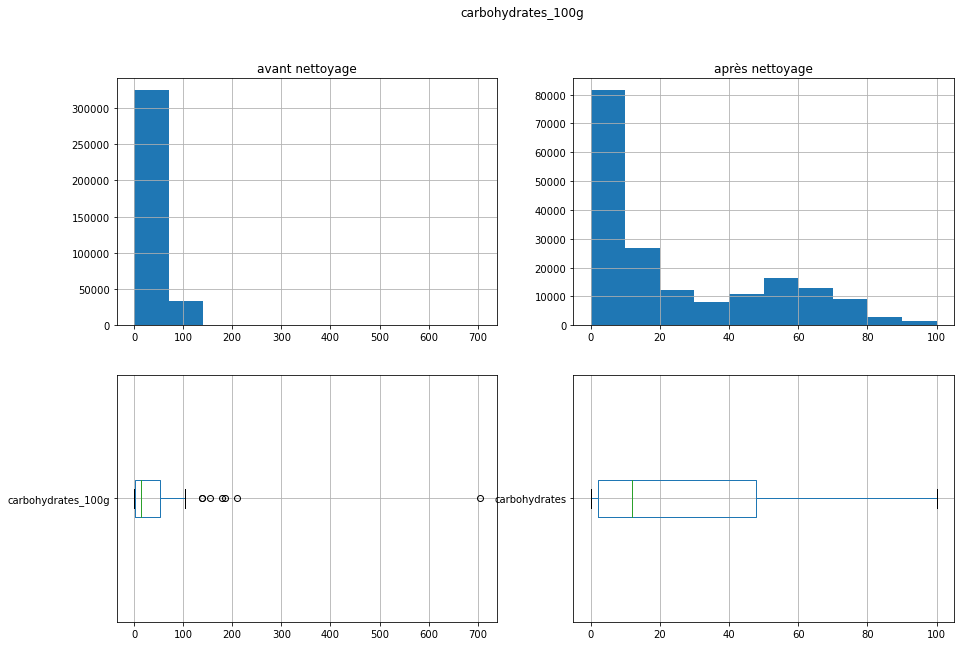

--------------------
sugars_100g
moy:
 13.837877198954914 & après nettoyage 12.484491176694013
med:
 3.5 & après nettoyage 3.2
mod:
 0    0.0
dtype: float64 & après nettoyage 0    0.0
dtype: float64
var:
 408.66910431420445 & après nettoyage 340.30276099675416
ect:
 20.21556589151549 & après nettoyage 18.44729684795998
skw:
 1.7910319830631967 & après nettoyage 1.8779984642083887
kur:
 2.5979328922596925 & après nettoyage 3.106856296211305


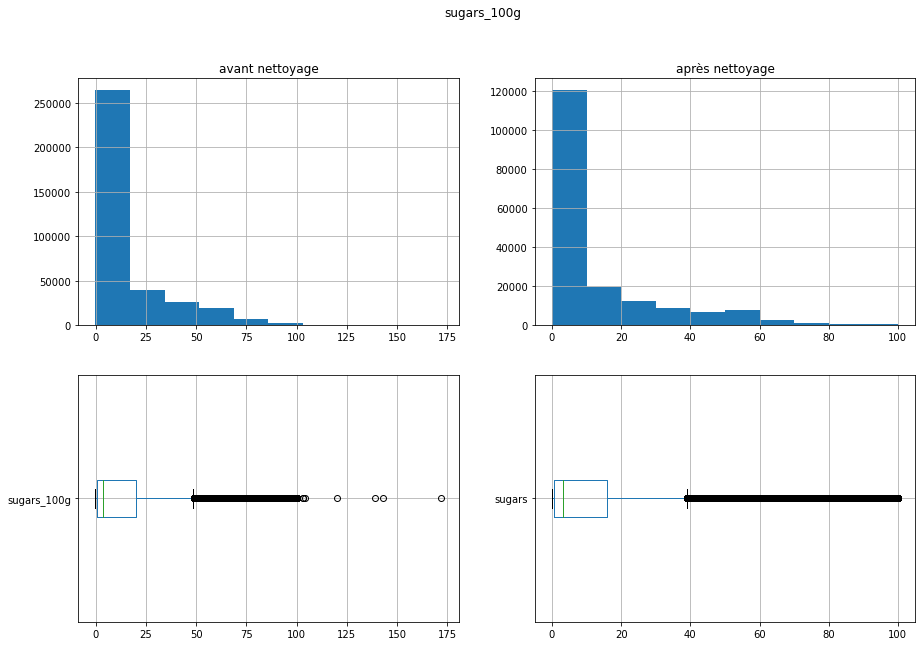

--------------------
proteins_100g
moy:
 8.660697859193306 & après nettoyage 8.662233939673893
med:
 6.0 & après nettoyage 6.3
mod:
 0    0.0
dtype: float64 & après nettoyage 0    0.0
dtype: float64
var:
 95.30583128012888 & après nettoyage 75.49084593148318
ect:
 9.762470552074863 & après nettoyage 8.688546825072832
skw:
 2.6574663486996504 & après nettoyage 1.8109334061894795
kur:
 12.930001202569297 & après nettoyage 6.76034727528341


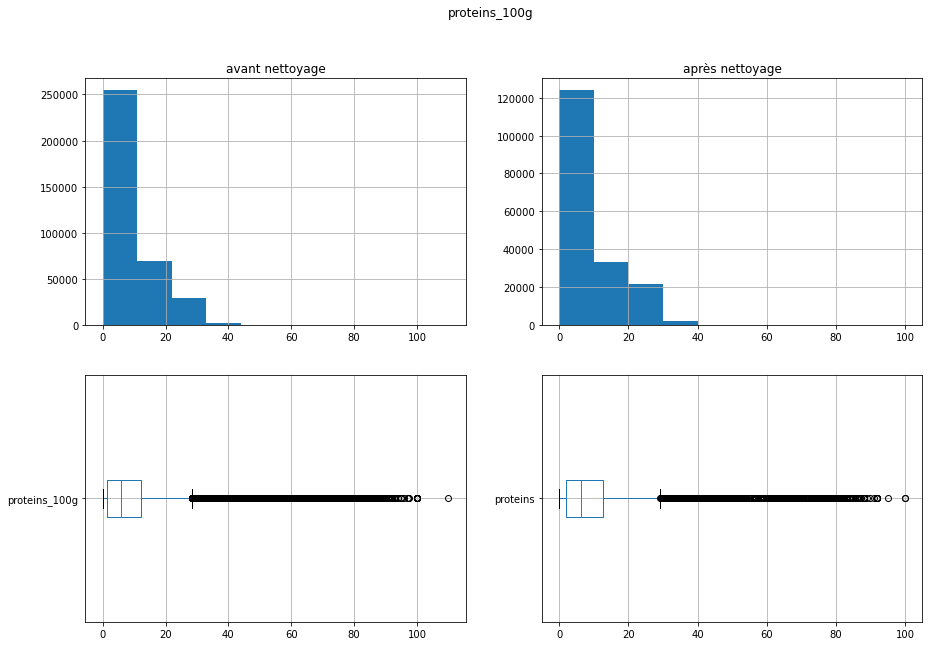

--------------------
salt_100g
moy:
 1.287066317688342 & après nettoyage 1.0101223245073592
med:
 0.53 & après nettoyage 0.6
mod:
 0    0.0
dtype: float64 & après nettoyage 0    0.0
dtype: float64
var:
 22.95192266597941 & après nettoyage 5.508086134767736
ect:
 4.790816492622047 & après nettoyage 2.3469312164543163
skw:
 14.6523649792537 & après nettoyage 18.421130214311887
kur:
 257.56798108414307 & après nettoyage 556.8509219728394


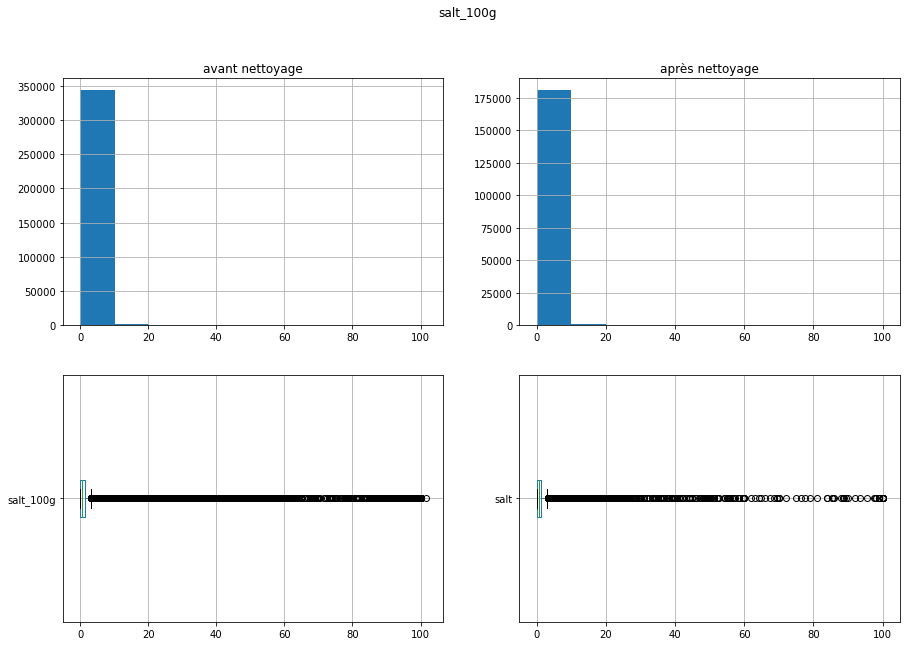

--------------------
sodium_100g
moy:
 0.5150087819695262 & après nettoyage 0.4043375250970487
med:
 0.212 & après nettoyage 0.24
mod:
 0    0.0
dtype: float64 & après nettoyage 0    0.0
dtype: float64
var:
 3.680134376611652 & après nettoyage 0.8948354954020086
ect:
 1.9183676333309139 & après nettoyage 0.9459574490440934
skw:
 14.657099874247784 & après nettoyage 18.794321461151288
kur:
 257.75288134174616 & après nettoyage 581.4554359163958


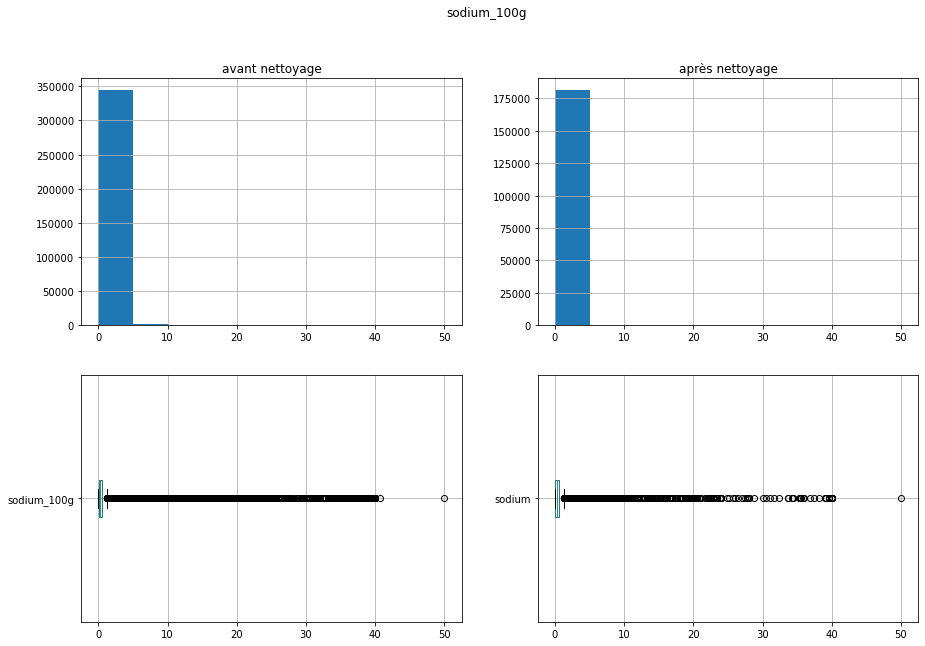

--------------------
nutrition-score-fr_100g
moy:
 9.44511476129103 & après nettoyage 9.434661087682306
med:
 10.0 & après nettoyage 10.0
mod:
 0    14.0
dtype: float64 & après nettoyage 0    14.0
dtype: float64
var:
 77.41029690390556 & après nettoyage 77.35537763729096
ect:
 8.798312162222114 & après nettoyage 8.795190596984863
skw:
 0.1053008705839701 & après nettoyage 0.10597250769739537
kur:
 -0.9401770621455423 & après nettoyage -0.9402482895441642


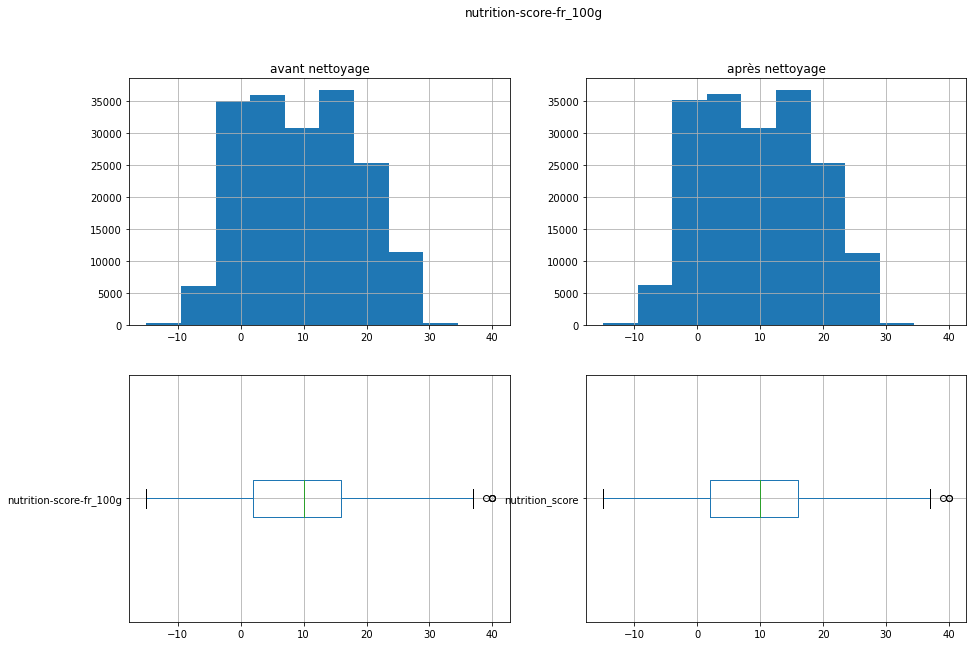

In [37]:
for col,col1 in zip(dff.select_dtypes('float'),data):
    print("-"*20)
    print(col)
    print("moy:\n",dff[col].mean(),"& après nettoyage",data[col1].mean())
    print("med:\n",dff[col].median(),"& après nettoyage",data[col1].median())
    print("mod:\n",dff[col].mode(),"& après nettoyage",data[col1].mode())
    print("var:\n",dff[col].var(ddof=0),"& après nettoyage",data[col1].var(ddof=0))
    print("ect:\n",dff[col].std(ddof=0),"& après nettoyage",data[col1].std(ddof=0))
    print("skw:\n",dff[col].skew(),"& après nettoyage",data[col1].skew())               # 0 : symétrique / plus grand étalé à droite / plus petit : étalé à gauche
    print("kur:\n",dff[col].kurtosis(),"& après nettoyage",data[col1].kurtosis())   ## plus grand que 0 : les observations sont concentré
    plt.figure(figsize=(15, 10))
    plt.subplot(221)
    plt.suptitle(col)
    plt.title('avant nettoyage')
    dff[col].hist()
    plt.subplot(222)
    plt.title('après nettoyage')
    data[col1].hist()
    plt.subplot(223)
    dff.boxplot(column=col, vert=False)
    plt.subplot(224)
    data.boxplot(column=col1, vert=False,)
    plt.show()
    



In [38]:
targuet = targuet.reset_index()

In [39]:
targuet = targuet.drop(['index'],axis=1)

In [40]:
df = pd.concat([data, targuet], axis=1)

In [41]:
df.to_csv(r'C:\Users\matthieu.cazier\Documents\OC\P3\df.csv')

### Fin du nettoyage des données, la suite dans le notebook d'exploration